# Windy gridworld

In [25]:
import numpy as np


## Create environment

In [30]:
gamma = 1
s_initial = [3, 0]
s_terminal = [3, 7]
row_env, col_env = 7, 10

# Actions
act_names = ['U', 'R', 'D', 'L']
n_act = len(act_names)

def env(s, a):
    s_row = s[0]
    s_col = s[1]

    a_row, a_col = actions(a)
    # print('a', actions(a))

    wind_1 = [3, 4, 5, 8]
    wind_2 = [6, 7]

    if s_col in wind_1:
        wind = 1
    elif s_col in wind_2:
        wind = 2
    else:
        wind = 0


    s_row = s_row + a_row + wind
    s_col = s_col + a_col

    s_row = min(max(s_row, 0), row_env-1)
    s_col = min(max(s_col, 0), col_env-1)
    
    return [s_row, s_col]

def actions(a):
    move = [[1,0],[0,1],[-1,0],[0,-1]]
    return move[a]

def reward(s):
    if s == s_terminal:
        return 0
    else:
        return -1

## Define parameters

In [31]:
eps = 0.1
alp = 0.5

In [32]:
def choose_act(s, eps):
    if np.random.uniform() < eps:
        return np.random.randint(n_act)
    else:
        return np.argmax(Q_table[s[0], s[1]])

In [132]:
from IPython.display import clear_output

n_episodes = 1000
steps_list = [0]
steps = 0

# Difine Q table
Q_table = np.zeros((row_env, col_env, n_act))

for episode in range(n_episodes):
    s = s_initial
    a = choose_act(s, eps)
    # steps = 0
    while s != s_terminal:
        # clear_output(wait=True)
        s_next = env(s, a)
        R = reward(s_next)
        a_next = choose_act(s_next, eps)
        Q = Q_table[s[0], s[1], a]
        Q_next = Q_table[s_next[0], s_next[1], a_next]
        Q_table[s[0], s[1], a] = Q + alp*(R + gamma*Q_next - Q)
        s = s_next
        a = a_next
        steps += 1
        # print(state_now)
    steps_list.append(steps)

# print(steps_list)



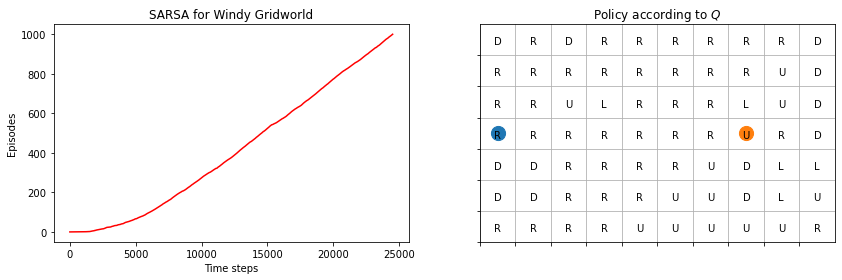

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(steps_list, range(n_episodes+1), 'r-')
plt.xlabel('Time steps')
plt.ylabel('Episodes')
# plt.ylim(0, 170)
plt.title('SARSA for Windy Gridworld')
ax = plt.subplot(1, 2, 2)
plt.xlim(0, 10)
plt.ylim(0, 7)
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 7, 1))
ax.axes.get_xaxis().set_ticklabels([])
ax.axes.get_yaxis().set_ticklabels([])
plt.grid()

for srow in range(7):
    for scol in range(10):
        s = (srow, scol)
        a = np.argmax(Q_table[s])
        plt.text(scol+0.4, srow+0.35, act_names[a])
        if (scol, srow)==(7, 3) or (scol, srow)==(0, 3):
            plt.scatter(scol+0.5, srow+0.5, s=200, marker='o')
plt.title('Policy according to $Q$')
plt.show()

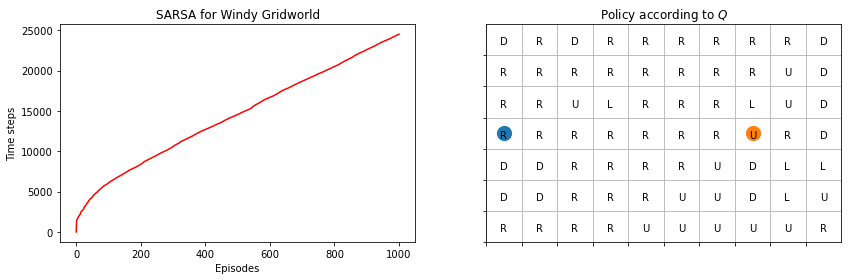

In [134]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(range(n_episodes+1), steps_list, 'r-')
plt.ylabel('Time steps')
plt.xlabel('Episodes')
# plt.xlim(0, 170)
plt.title('SARSA for Windy Gridworld')

ax = plt.subplot(1, 2, 2)
plt.xlim(0, 10)
plt.ylim(0, 7)
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 7, 1))
ax.axes.get_xaxis().set_ticklabels([])
ax.axes.get_yaxis().set_ticklabels([])
plt.grid()

for srow in range(7):
    for scol in range(10):
        s = (srow, scol)
        a = np.argmax(Q_table[s])
        plt.text(scol+0.4, srow+0.35, act_names[a])
        if (scol, srow)==(7, 3) or (scol, srow)==(0, 3):
            plt.scatter(scol+0.5, srow+0.5, s=200, marker='o')
plt.title('Policy according to $Q$')
plt.show()

In [135]:
state_list = []
s = s_initial
a = choose_act(s, 0)
state_list.append(s)
for i in range(100):
    s_next = env(s, a)
    s = s_next
    a = choose_act(s, 0)
    state_list.append(s)
    if s == s_terminal:
        break

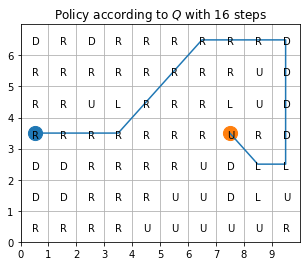

In [136]:
state_list_array = np.transpose(np.array(state_list))+0.5

plt.figure(figsize=(5, 4))

plt.xlim(0, 10)
plt.ylim(0, 7)
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 7, 1))
ax.axes.get_xaxis().set_ticklabels([])
ax.axes.get_yaxis().set_ticklabels([])
plt.grid()

for srow in range(7):
    for scol in range(10):
        s = (srow, scol)
        a = np.argmax(Q_table[s])
        plt.text(scol+0.4, srow+0.35, act_names[a])
        if (scol, srow)==(7, 3) or (scol, srow)==(0, 3):
            plt.scatter(scol+0.5, srow+0.5, s=200, marker='o')
plt.plot(state_list_array[1], state_list_array[0])
plt.title('Policy according to $Q$ with '+str(len(state_list))+' steps')
plt.show()